In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [2]:
import pandas as pd

# Read the CSV file
bnbdf = pd.read_csv("hotel_booking.csv")


In [3]:
duplicate_count = bnbdf.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
df = bnbdf.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 0


In [4]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              8
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1494
company                           9320
days_in_waiting_list     

<Axes: >

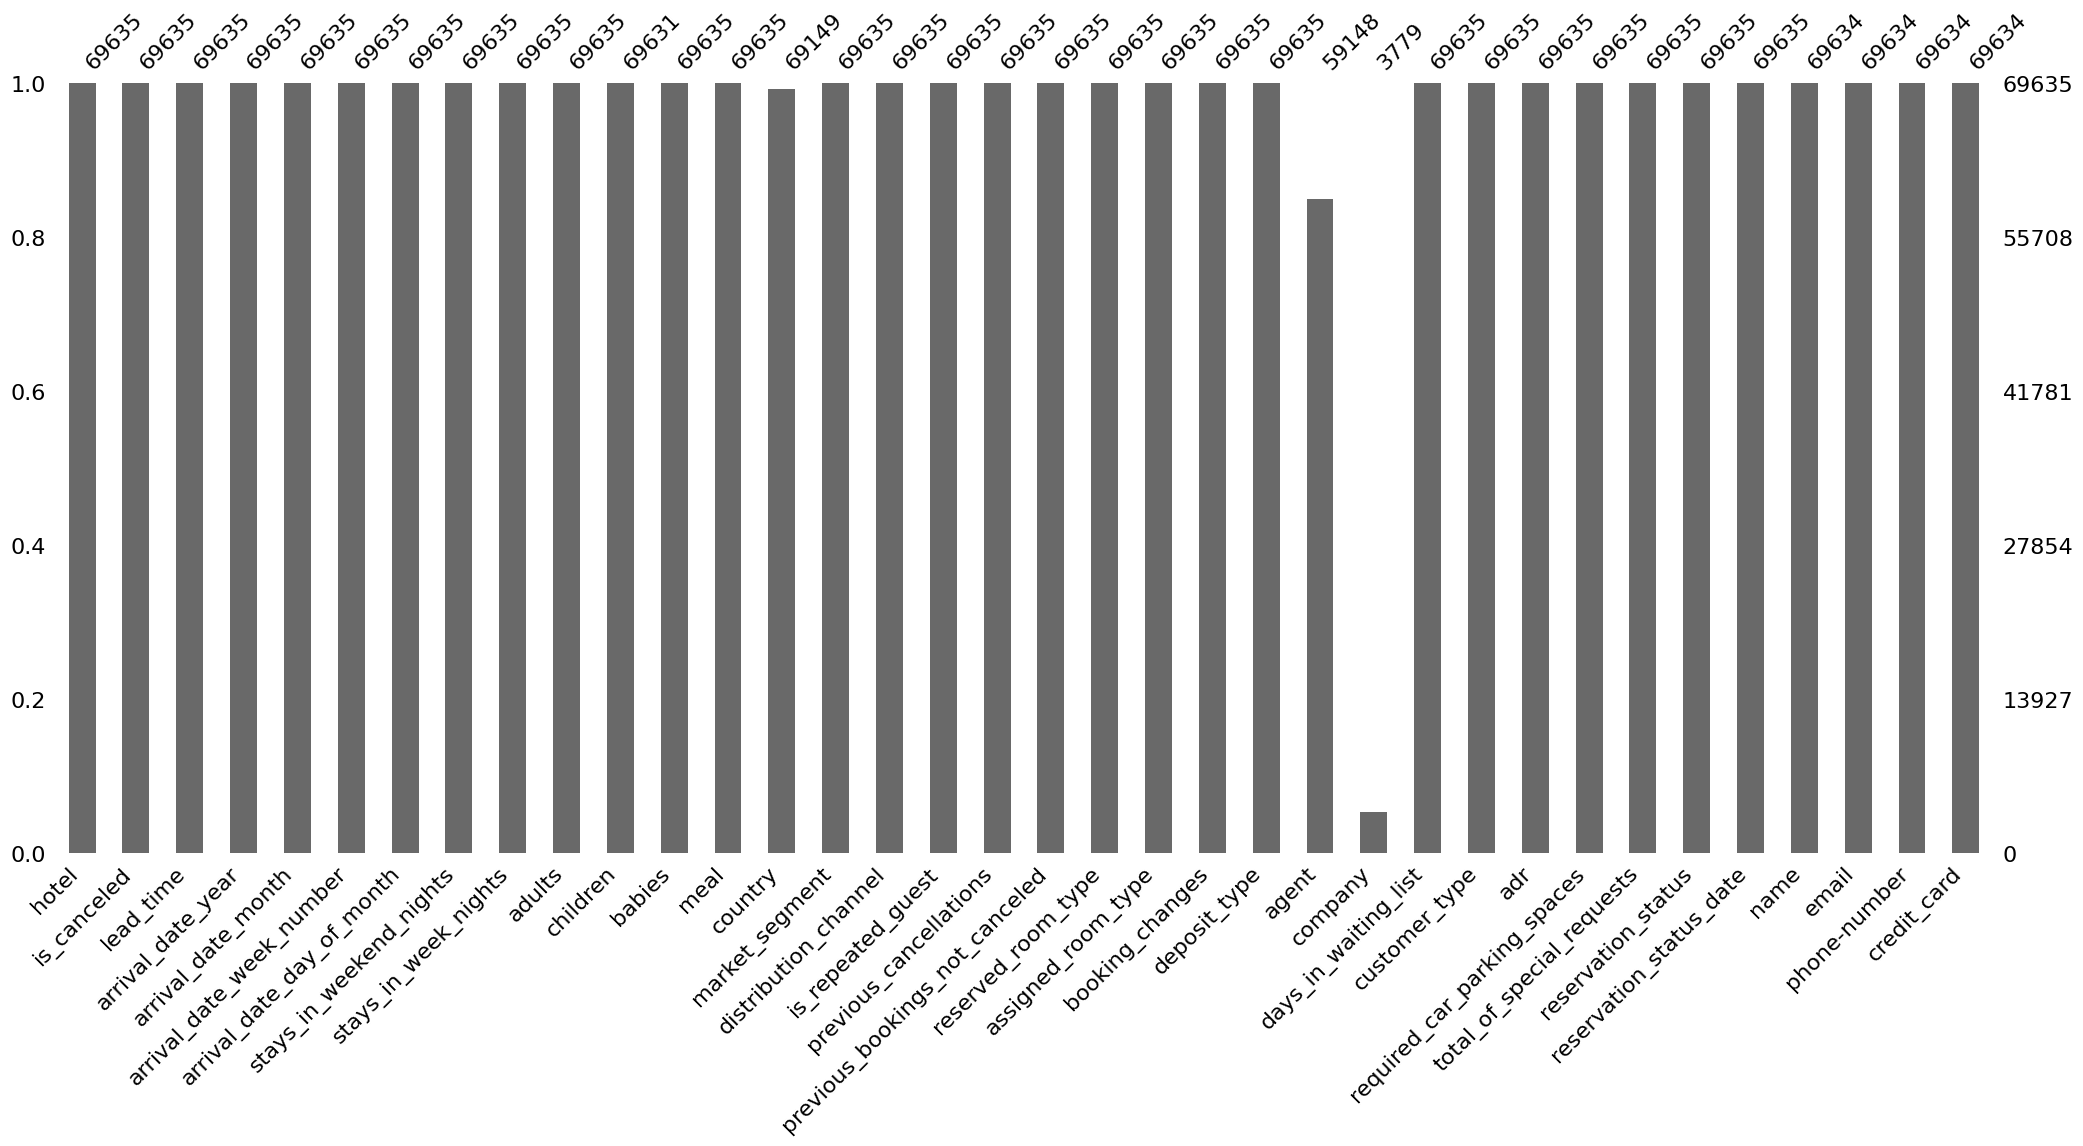

In [ ]:
mano.bar(df)


<Axes: >

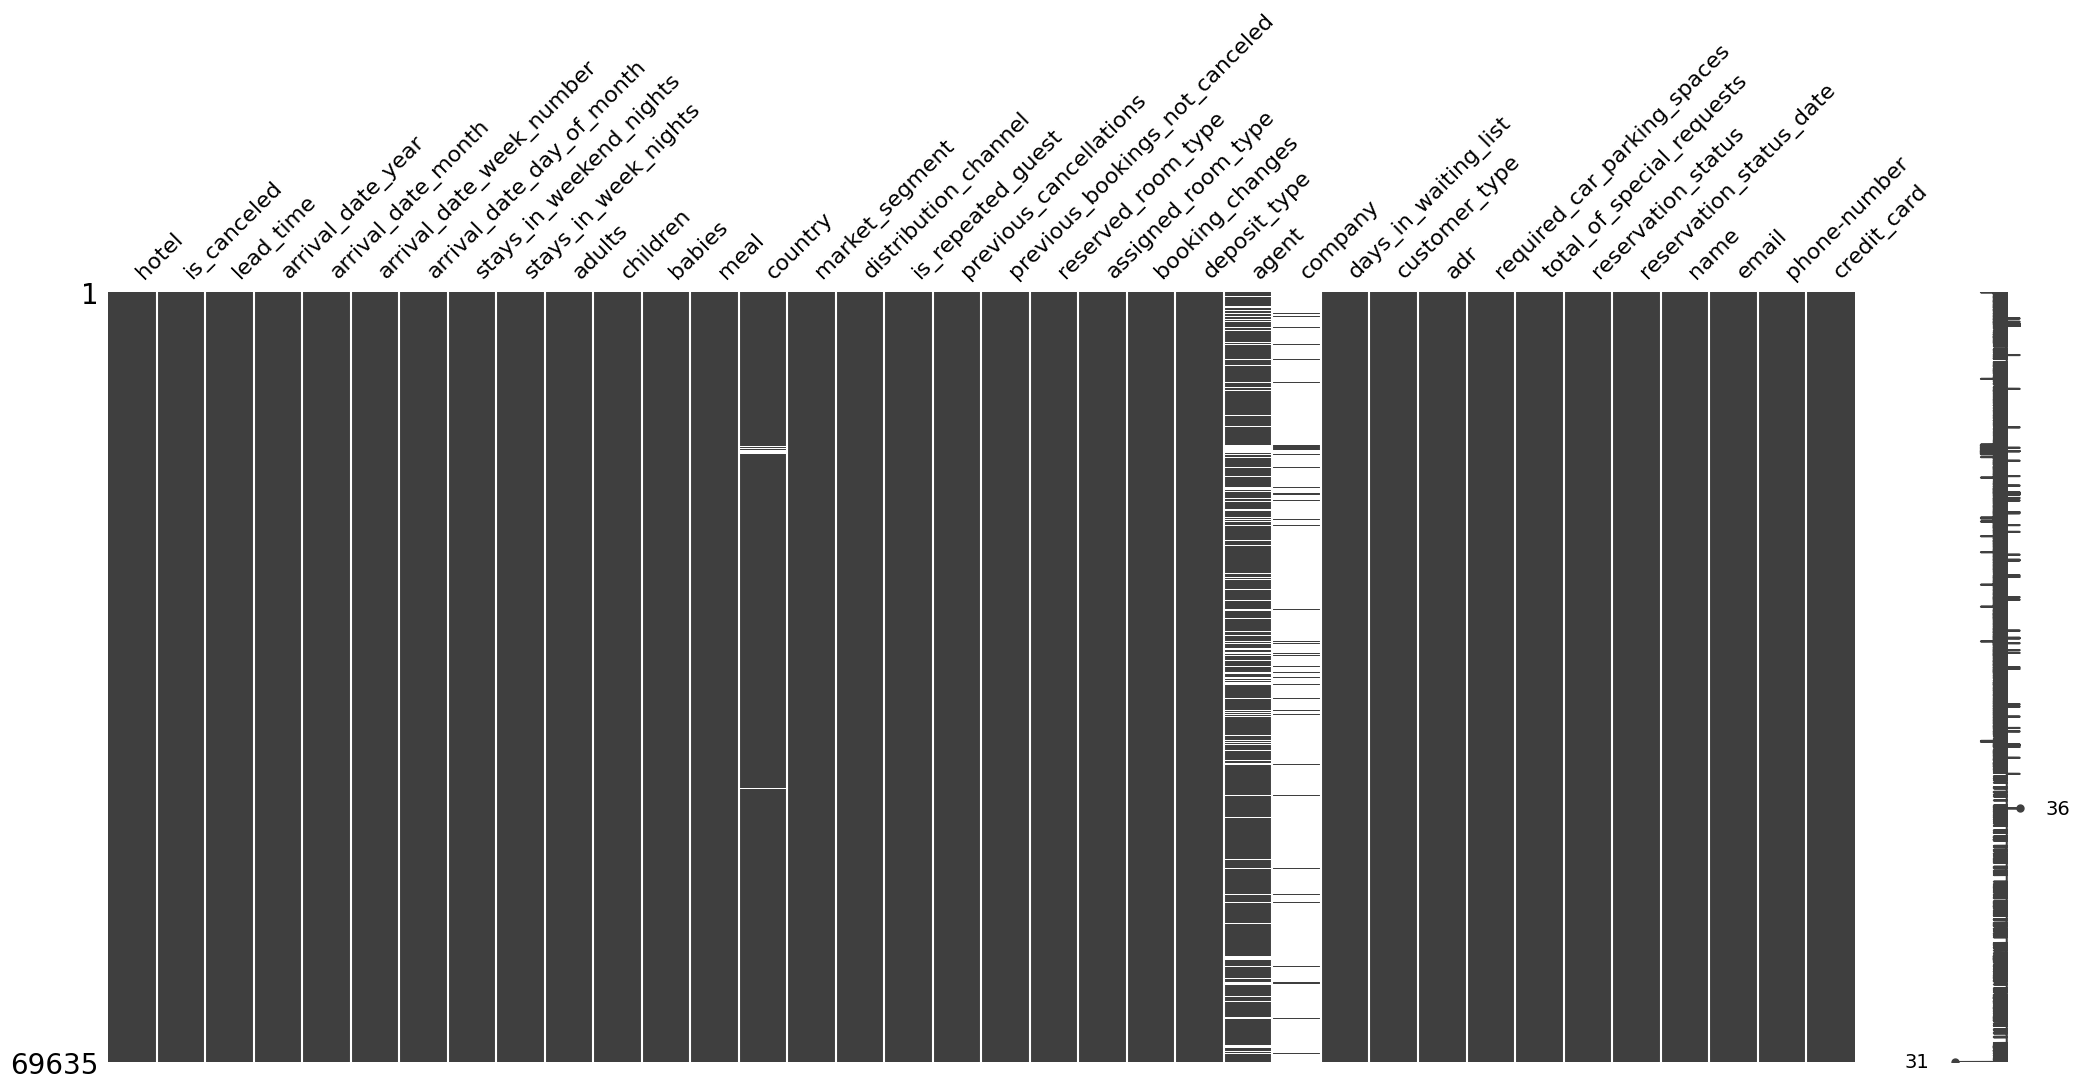

In [ ]:
mano.matrix(df)

# Missing Value Analysis

There are 4 Columns with missing values

The first one is  children with 4 missing values. We will take the mean and fill in the missing values with it.

In [5]:

mean_children = df['children'].mean()
df['children'] = df['children'].fillna(mean_children)


Country column has 488 missing values

We will fill in the missing values with mode

In [6]:


country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)


Dropping company column since it has around 80% missing values.

In [7]:
df.drop('company', axis=1, inplace=True)

In [8]:


from sklearn.impute import KNNImputer

# Define the imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the 'agent' column
df['agent'] = imputer.fit_transform(df[['agent']])


Checking if there are still any missing values

In [9]:
if df.isnull().sum().any():
    print("Yes")
else:
    print("No")


No


# Exploratory Data Analysis

We will start by printing uniques values of each column to better understand the dataset.

In [10]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

For better visibilty of reservarton date, we divide the date into year, day and month

In [11]:
#categorical column's new dataframe
categorical_df = df[categorical_cols]

# Attempt to convert to datetime, handling errors
categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'], errors='coerce')

# Check for invalid dates
invalid_dates = categorical_df[categorical_df['reservation_status_date'].isnull()]['reservation_status_date']
print(f"Invalid dates found at positions: {invalid_dates.index.tolist()}")

categorical_df['year'] = categorical_df['reservation_status_date'].dt.year
categorical_df['month'] = categorical_df['reservation_status_date'].dt.month
categorical_df['day'] = categorical_df['reservation_status_date'].dt.day
categorical_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

Invalid dates found at positions: []


<ipython-input-11-6d49cab596ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'], errors='coerce')
<ipython-input-11-6d49cab596ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['year'] = categorical_df['reservation_status_date'].dt.year
<ipython-input-11-6d49cab596ac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [12]:
for col in categorical_df:
    print(f"{col}: \n{categorical_df[col].unique()}\n") # Access column from the DataFrame 'df'

hotel: 
['Resort Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P']

assigned_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status: 
['Check-Out' 'Canceled' 'No-Show']

name: 
['Ernest Barne

From this Categorical data we can see that there are only two types of hotels, Resort and City.

This data is recorded from 2014-2017

Visualzing the countries from where the guests come from.

interactive(children=(IntSlider(value=10, description='n', max=73, min=1), Output()), _dom_classes=('widget-in…

<ipython-input-13-e91566b63294>:28: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


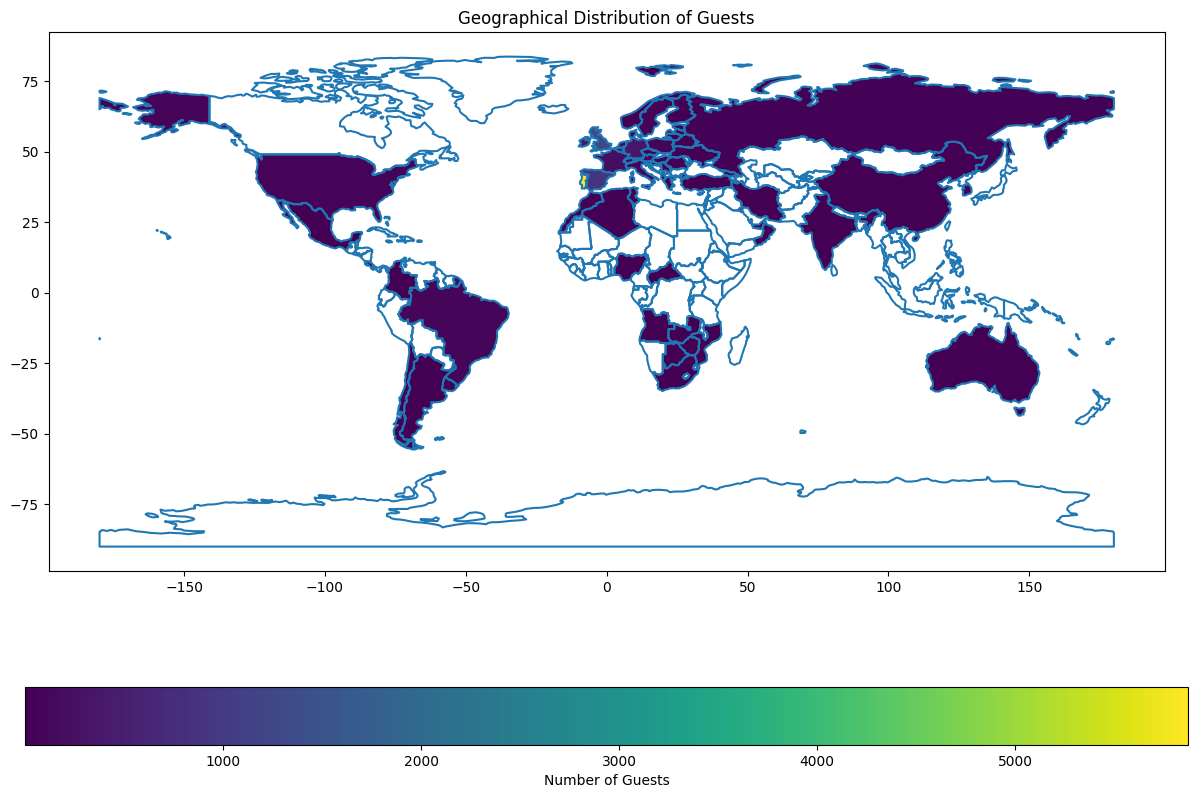

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import seaborn as sns
# Frequency Count
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sort by count
country_counts = country_counts.sort_values(by='count', ascending=False)

# Function to plot data for a selected number of countries
def plot_top_n_countries(n):
    plt.figure(figsize=(15, 8))
    sns.barplot(x=country_counts['country'][:n], y=country_counts['count'][:n], palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Top {n} Countries by Number of Guests')
    plt.xlabel('Country')
    plt.ylabel('Number of Guests')
    plt.show()

# Interactive slider
interact(plot_top_n_countries, n=IntSlider(min=1, max=len(country_counts), step=1, value=10))

import geopandas as gpd

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Frequency Count
country_counts = df['country'].value_counts()
# Merge with country counts
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['iso_a3', 'guest_count']

# Merge country data with world map data
world = world.merge(country_counts_df, on='iso_a3', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='guest_count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Guests",
                        'orientation': "horizontal"})
plt.title('Geographical Distribution of Guests')
plt.show()

The bar graph above with an interactive slider shows that the most number of guests are from Portugal. And the Map helps us visualize that guests are coming from all over the world.

Now we will check the **seasonality** - the months that are the most busy vs months that are not busy.

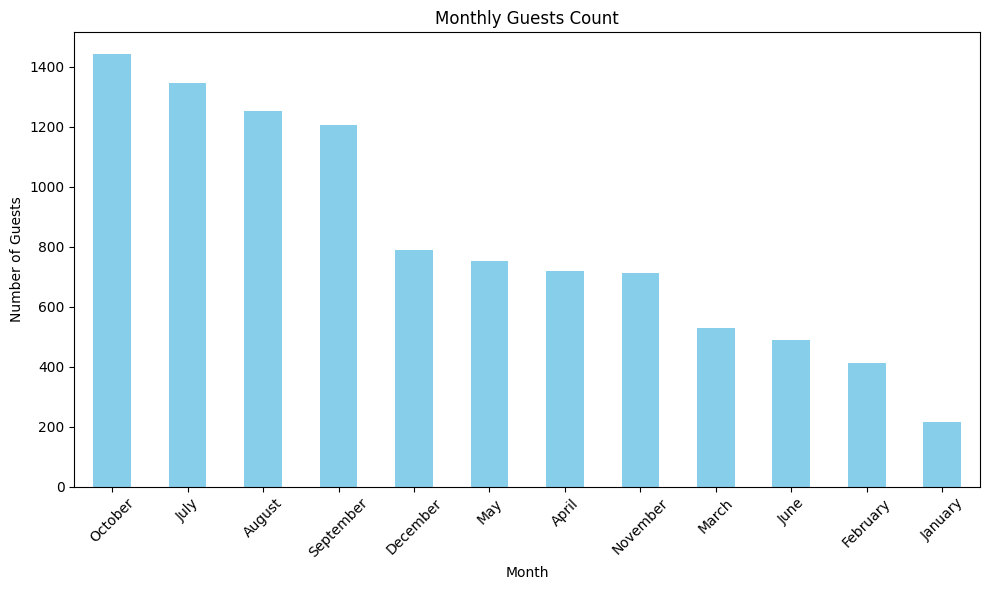

In [14]:
monthly_guests = df['arrival_date_month'].value_counts().sort_values(ascending=False)
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_guests.plot(kind='bar', color='skyblue')
plt.title('Monthly Guests Count')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


August has the most amount of guests, so we will now check if the prices are high or low at that time of the year.

**Price vs Month**

We will use ADR(Average Daily Rate ) for the Price.

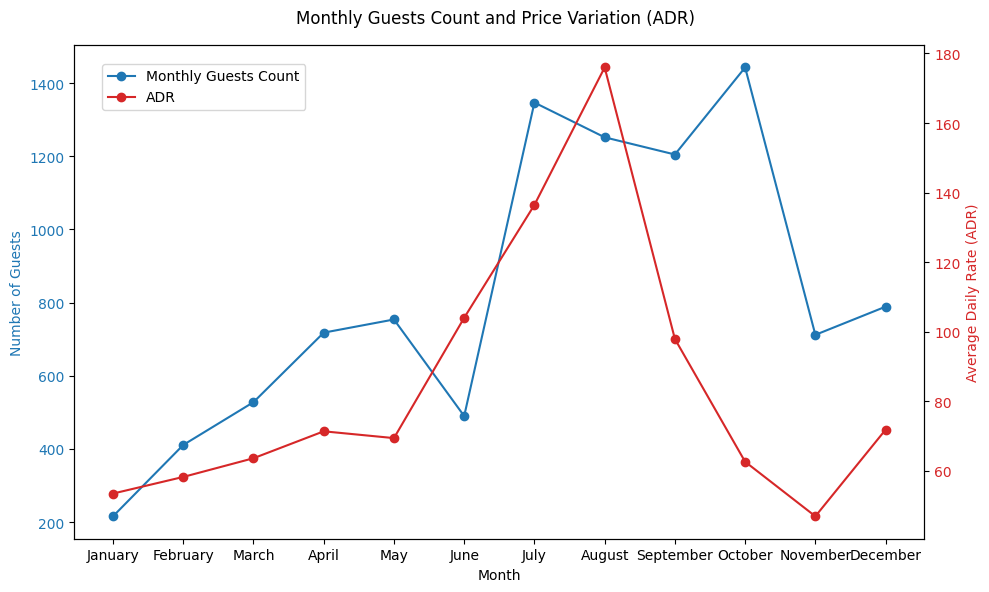

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Converting arrival_date_year and arrival_date_month to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B')

#  monthly guest count
monthly_guest_count = df['arrival_date_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    fill_value=0
)

#  monthly ADR (Average Daily Rate)
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

#  a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the monthly guest count on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Guests', color=color)
ax1.plot(monthly_guest_count.index, monthly_guest_count.values, marker='o', color=color, label='Monthly Guests Count')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis to plot the ADR
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (ADR)', color=color)
ax2.plot(monthly_adr.index, monthly_adr.values, marker='o', color=color, label='ADR')
ax2.tick_params(axis='y', labelcolor=color)

# title and a legend
fig.suptitle('Monthly Guests Count and Price Variation (ADR)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Showing the plot
plt.show()


**Key Insights**


Seasonality: The data indicates a strong seasonal pattern with peaks in guest numbers during late spring and summer months (May and July), and a corresponding peak in ADR during the summer (August).


Price Sensitivity: The ADR seems to adjust in response to changes in guest numbers, increasing during high demand periods and decreasing during low demand periods.


Strategic Pricing: The stable ADR in June despite a drop in guest numbers might suggest strategic pricing decisions to maintain revenue.

## **Booking Cancellation **

We will look at the cancellation rates over time.

Showing how cancellation rate changes over several months

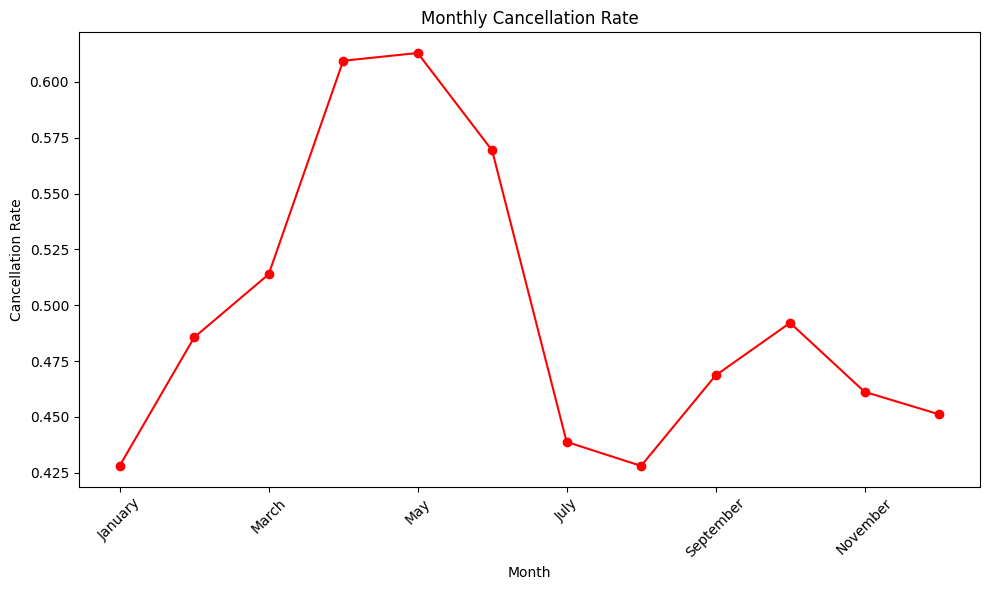

In [ ]:
import matplotlib.pyplot as plt

# Calculate monthly cancellation rate
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plotting
plt.figure(figsize=(10, 6))
monthly_cancellations.plot(kind='line', marker='o', color='red')
plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Overall** **Patterns**:

Early and Late Year: The beginning of the year (January) and mid-year (July) show lower cancellation rates compared to the middle months.

Mid-Year: May and June are critical months with the highest cancellation rates, suggesting potential seasonality or external factors influencing these peaks.

**Cancellation Rate by Room Type**

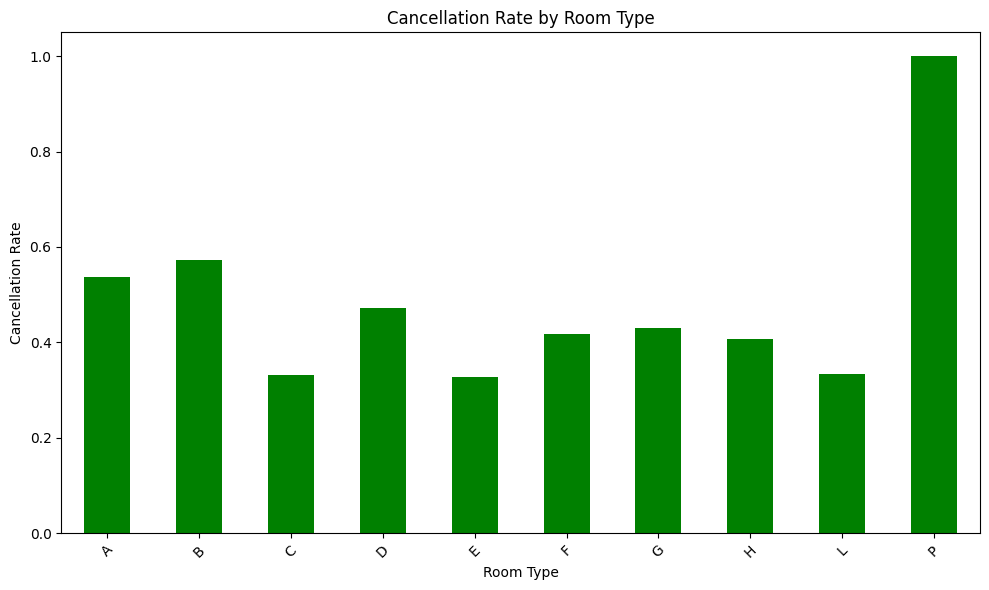

In [ ]:
# Calculate cancellation rate by reserved room type
room_type_cancellation = df.groupby('reserved_room_type')['is_canceled'].mean()

# Plotting
plt.figure(figsize=(10, 6))
room_type_cancellation.plot(kind='bar', color='green')
plt.title('Cancellation Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Room Type P: The extremely high cancellation rate for room type P is notable and might require further investigation to understand the cause (e.g., specific issues with that room type, policy differences, etc.).


**Cancellations by Country**

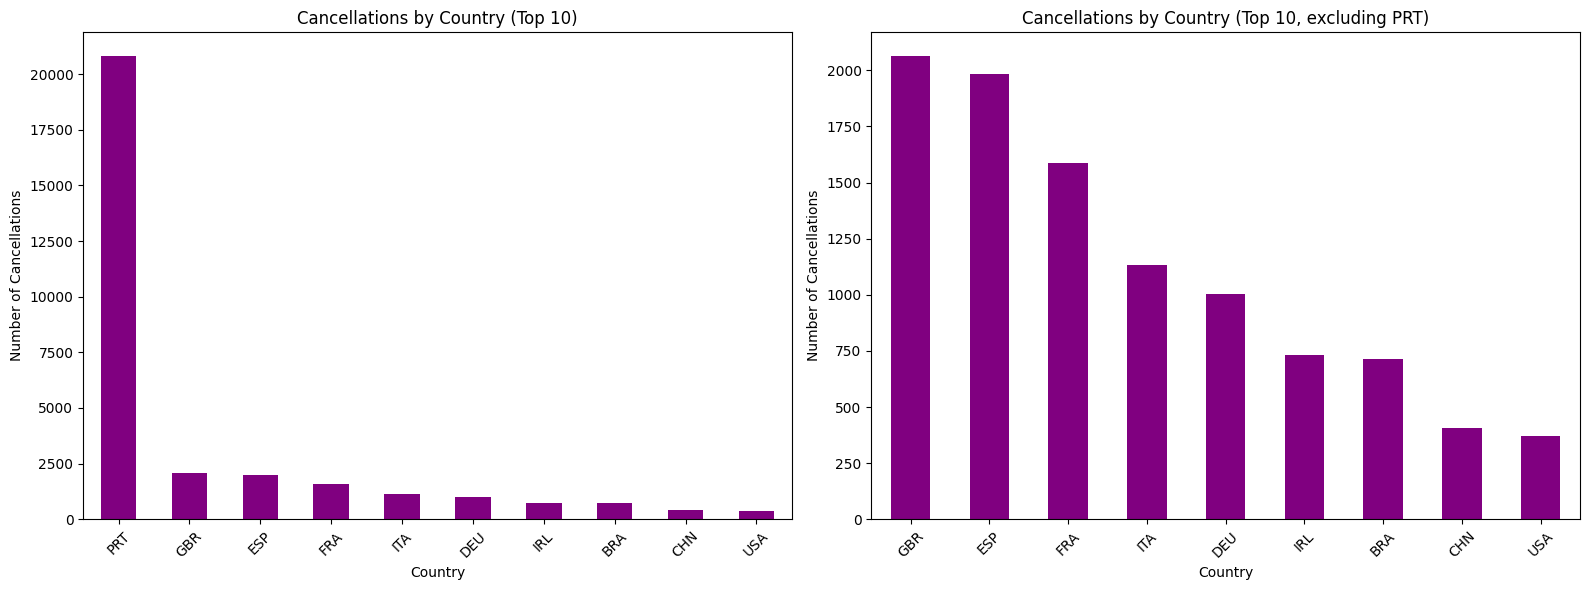

In [ ]:
# Calculate cancellations by country
country_cancellations = df[df['is_canceled'] == 1]['country'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

# Plot with 'PRT'
country_cancellations.plot(kind='bar', color='purple', ax=axes[0])
axes[0].set_title('Cancellations by Country (Top 10)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Cancellations')
axes[0].tick_params(axis='x', rotation=45)

# Plot without 'PRT'
country_cancellations_no_prt = country_cancellations.drop('PRT')
country_cancellations_no_prt.plot(kind='bar', color='purple', ax=axes[1])
axes[1].set_title('Cancellations by Country (Top 10, excluding PRT)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Cancellations')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Portugal's dominant position in cancellations is significant, and its exclusion reveals a more balanced distribution among other top countries. This could point to regional factors or marketing differences affecting cancellation rates

**Cancellation Rate by Lead Time**

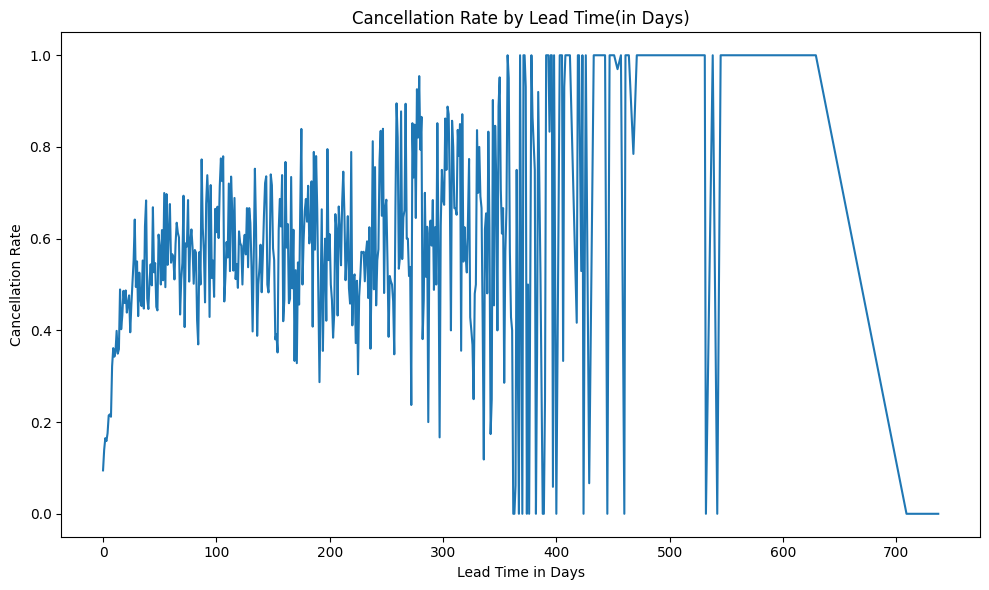

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cancellation rate by lead time
lead_time_cancellation = df.groupby('lead_time')['is_canceled'].mean().reset_index() # Convert to DataFrame

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=lead_time_cancellation, x='lead_time', y='is_canceled') # Specify x and y columns
plt.title('Cancellation Rate by Lead Time (in Days)')
plt.xlabel('Lead Time in Days')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

The plot suggests that as the lead time increases, the cancellation rate also tends to increase, particularly up to a certain point (around 300-400 days). This implies that people who book far in advance (high lead time) are generally more likely to cancel their bookings.

**Heatmap of Cancellations by Month and Day of Week**

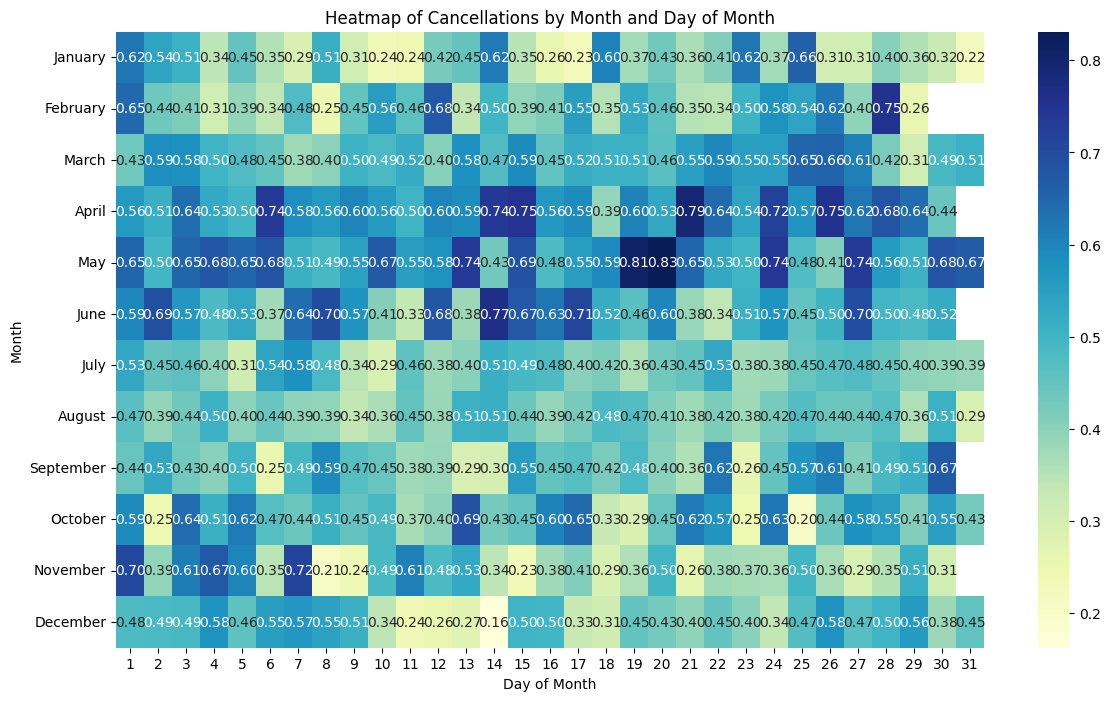

In [ ]:
import seaborn as sns

# Create a pivot table
cancellation_heatmap_data = df.pivot_table(index='arrival_date_month', columns='arrival_date_day_of_month', values='is_canceled', aggfunc='mean').reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(cancellation_heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Cancellations by Month and Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()


The heatmap reveals that there are no significant patterns for cancellations on specific days of the month across all months, but there are noticeable peaks in certain months.

# **Repeated Guests**

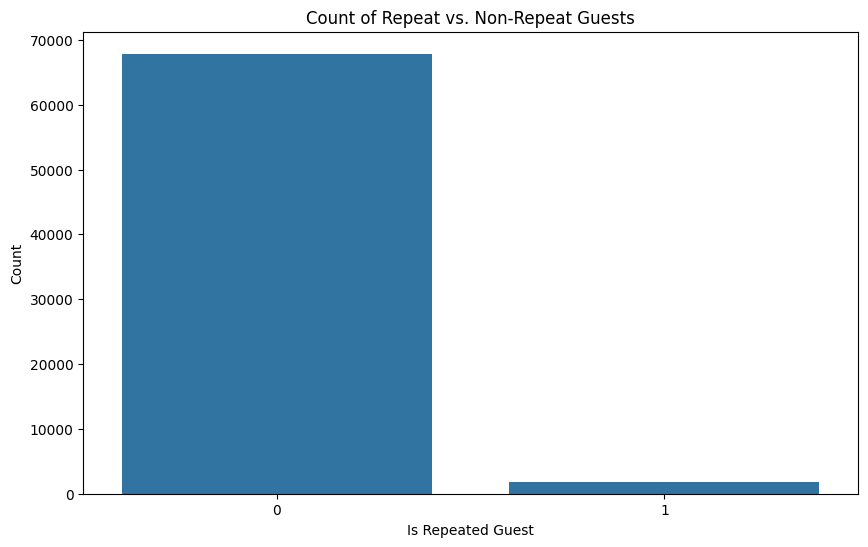

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='is_repeated_guest', data=df)
plt.title('Count of Repeat vs. Non-Repeat Guests')
plt.xlabel('Is Repeated Guest')

plt.ylabel('Count')
plt.show()

The number of non-repeat guests (around 70,000) is significantly higher than repeat guests (under 10,000). This indicates that the majority of the hotel's customers are first-time visitors.


**Box Plot for Lead Time of Repeat vs. Non-Repeat Guests:**

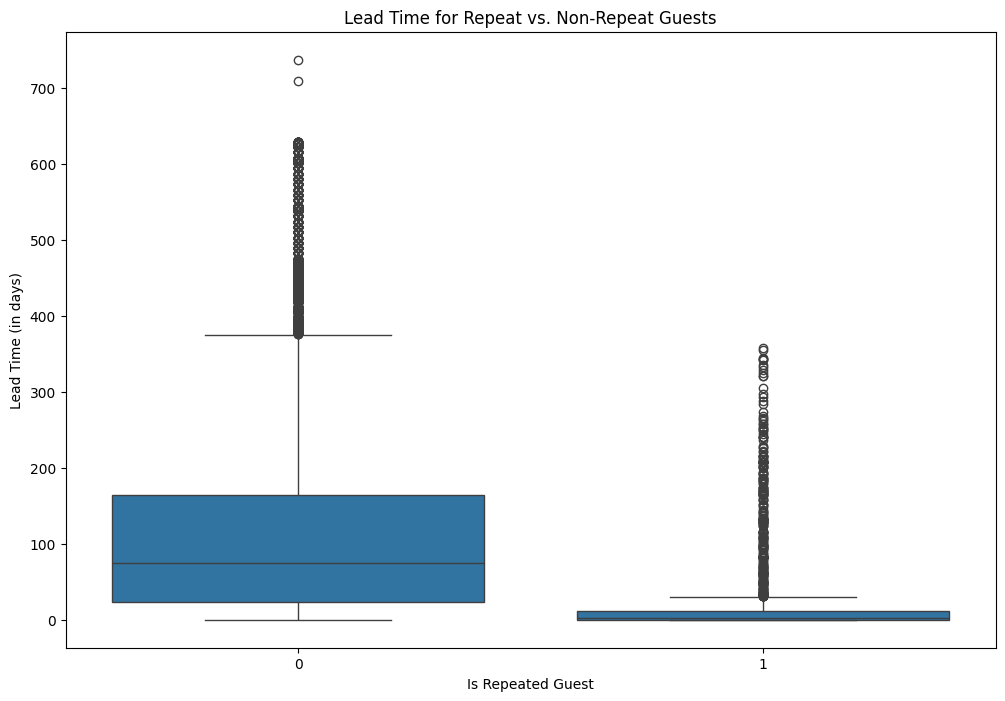

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_repeated_guest', y='lead_time', data=df)
plt.title('Lead Time for Repeat vs. Non-Repeat Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Lead Time (in days)')
plt.show()


**Key Insights**

Non-Repeat Guests display a wide range of booking behaviors, with many booking far in advance, possibly due to being less familiar with the hotel or seeking to secure their stay early.
Repeat Guests are likely to have more confidence in last-minute availability or prefer the flexibility to book closer to their stay date.

Outliers:

Non-Repeat Guests: Significant number of outliers booking up to 700 days in advance, indicating a need for long-term planning or special events.
Repeat Guests: Outliers also exist but are generally within 100 days, showing that some repeat guests do plan ahead but not as far out as non-repeat guests.

**Heatmap for Previous Bookings Not Canceled:**

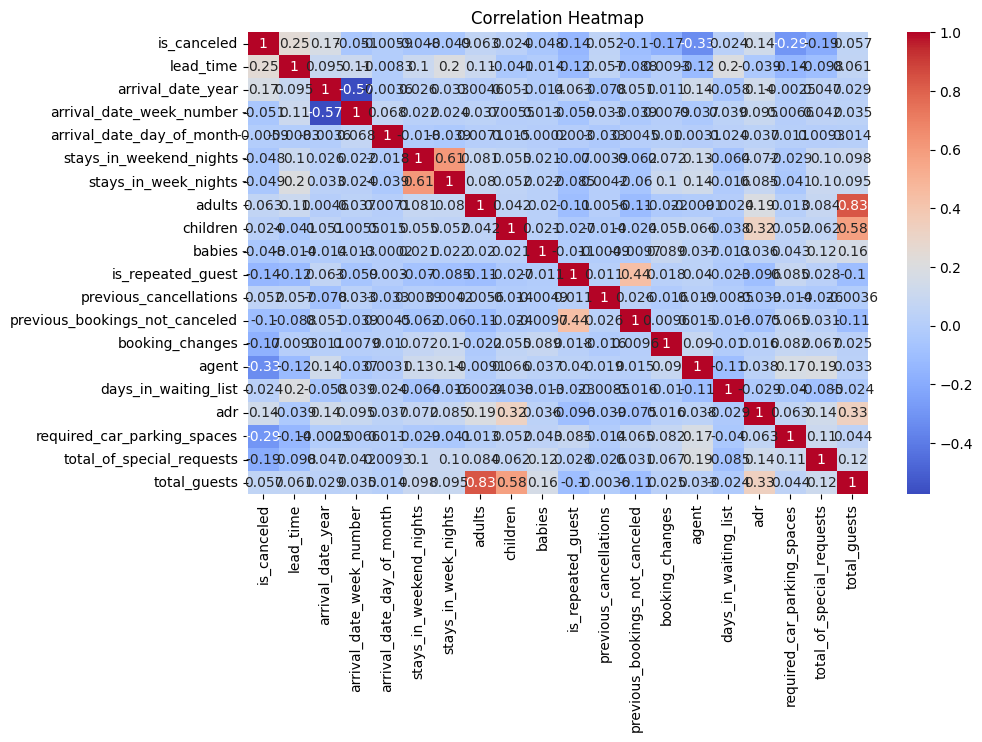

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for data manipulation

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Positive Correlations:
is_repeated_guest is positively correlated with the total number of previous bookings, indicating that repeat guests tend to have a history of bookings.
is_repeated_guest has a slight positive correlation with the total number of special requests.


Negative Correlations:
is_repeated_guest is negatively correlated with lead time, implying that repeat guests book closer to their stay date.

**Count Plot for Hotel Types and Repeat Guests:**

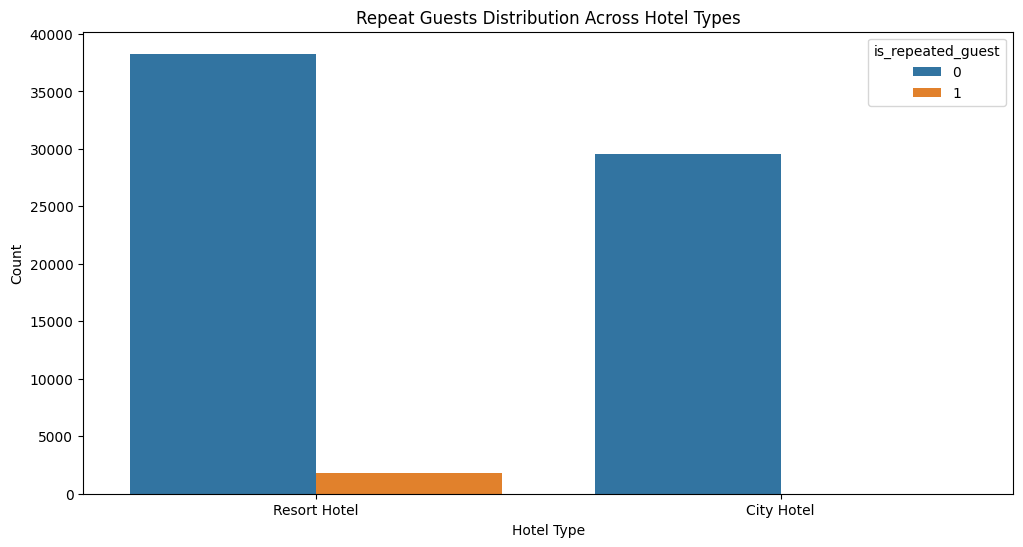

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel', hue='is_repeated_guest', data=df)
plt.title('Repeat Guests Distribution Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()


Resort Hotels: The majority of guests are non-repeat, with a small fraction being repeat guests.
City Hotels: There are no repeat guests, indicating that city hotels do not attract returning customers.

# Insights

The data represents three years of hotel bookings, primarily from Europe, with Portugal being the main source of bookings. The hotels are categorized into two types: Resorts and City Hotels. To better understand the data, I analyzed booking cancellations and repeat guests. I discovered that August is the busiest month, coinciding with high prices, while December, despite having fewer bookings, still maintains relatively high prices, which warrants further investigation. Most cancellations occur in May and June and are predominantly from Portugal. Additionally, bookings with more lead time tend to result in higher cancellation rates. In terms of repeat guests, the majority are first-time visitors.

# Recommendations

1. Identifying factors that influence repeat bookings.

Special Requests and Personalization: Since repeat guests have a slight positive correlation with the total number of special requests, focus on fulfilling special requests and personalizing the guest experience to encourage repeat bookings.

Manage Cancellations: Address the correlation between cancellations and repeat guests by implementing flexible cancellation policies and providing incentives for rebooking after a cancellation.

2. Significant variation in booking lead
times, with non-repeat guests booking far in advance and repeat guests booking closer to their stay date.

Solutions:
Advance Booking Discounts for Repeat Guests: Offer discounts or loyalty points to repeat guests who book well in advance to encourage earlier bookings.

Last-Minute Deals for Non-Repeat Guests: Promote last-minute deals to non-repeat guests to fill up rooms closer to the stay dates and reduce the lead time gap.


3.  A significantly higher number of non-repeat guests compared to repeat guests.

Solutions:
Enhanced Loyalty Program: Create a robust loyalty program that offers tangible benefits such as discounts, free services, or upgrades for repeat bookings to encourage non-repeat guests to return.

Personalized Follow-Ups: After a guest's stay, follow up with personalized offers and messages to encourage them to book again.



4. City hotels have no repeat guests, and resort hotels have a very small fraction of repeat guests.


Targeted Marketing for City Hotels: Implement marketing campaigns specifically aimed at converting first-time city hotel guests into repeat customers by offering incentives such as discounts on future stays, free amenities, or exclusive offers.

Improve Resort Hotel Offers: Enhance the attractiveness of resort hotels by offering packages that encourage repeat visits, such as seasonal promotions, family packages, or event-based packages (e.g., for holidays or local festivals).
